In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import pixie_read_st as pxr

In [2]:
import master_read as m
import efit_plots as e
import os
import sys

In [3]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True

In [4]:
eqdsk_file = "/users/giannis_kx/eqdsks/SN_fr_11_sh.geqdsk"

In [4]:
filepath = "/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/int_kink/11/11_visc_old_nodiff/11_visc_old_nodiff.scratch/"

In [6]:
def eqdsk_info():
    global a
    sys.stdout = open(os.devnull, 'w')
    m.read_geqdsk(eqdsk_file)
    m.struct_hor_ax_det()
    e.gridsNunits()
    e.intersections()
    sys.stdout = sys.__stdout__

In [5]:
pxr.pixieload(filepath + "pixie3d.h5")

timesteps= 87
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Prs', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J.(pi+pe)', 'J.Rho', 'J^1', 'J^2', 'J^3', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Ti+Te', 'chi par', 'chi perp', 'diff', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Prs_pert', 'Rho_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


In [6]:
pxr.Coordinate_Maps_Interpolations()

In [9]:
eqdsk_info()

In [7]:
ap = 2.18095

## t=500

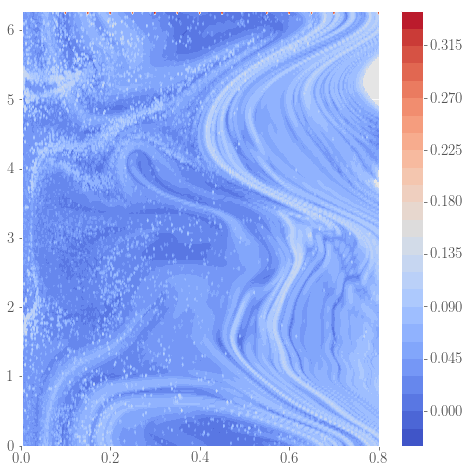

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


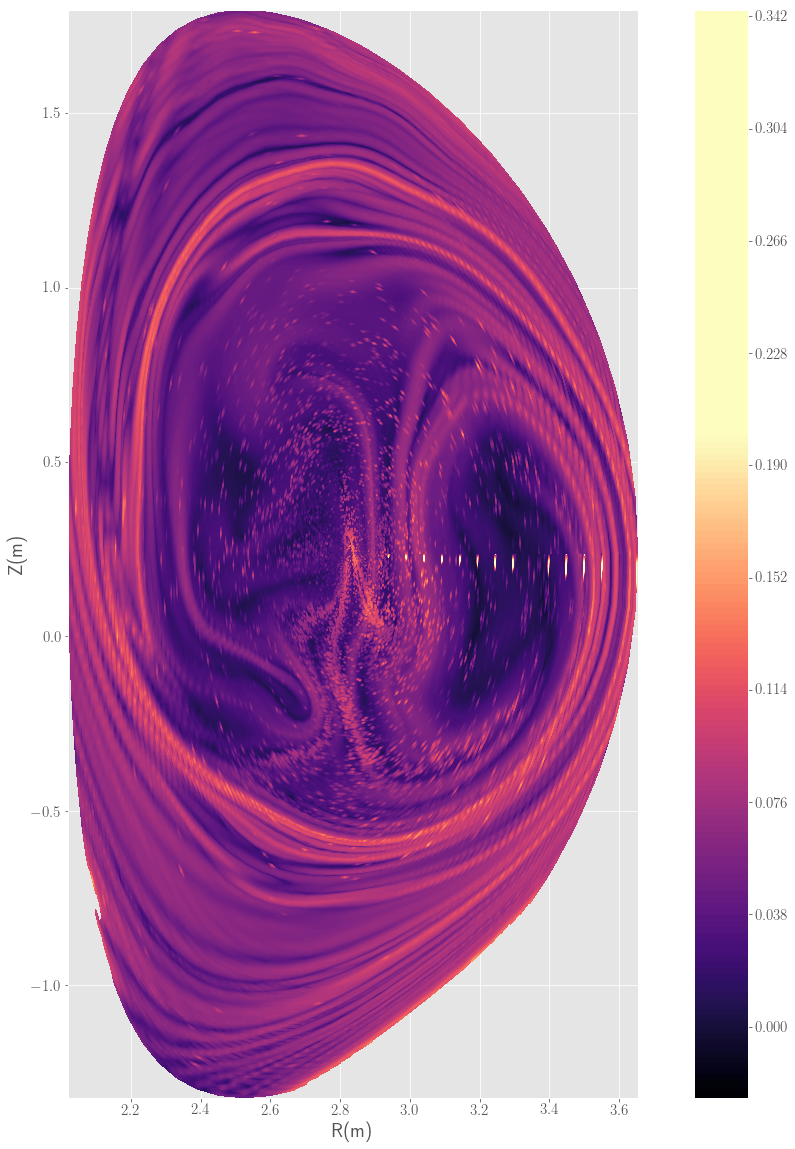

In [10]:
le500_path = "/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/int_kink/11/11_visc_old_nodiff/ftle/t-500/"

A500 = np.load(le500_path+"raw_t-500.sav.npz_giri_2.py.npz")

rs500 = A500['rr']
us500 = A500['th']
LE500 = A500['Lyap_exp']

plt.figure(figsize=(8,8))
plt.contourf(rs500,us500,LE500,30,cmap="coolwarm")
plt.colorbar()
plt.show()

x500 = pxr.x_array(rs500,us500)
z500 = pxr.z_array(rs500,us500)

plt.figure(figsize=(20,20))
plt.contourf(x500,z500,np.swapaxes(LE500,0,1),200,vmax = 0.2, cmap="magma")
#plt.plot([x/ap for x in m.DS.rbbbs],[y/ap for y in m.DS.zbbbs],"k--")
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.axes().set_aspect("equal")
plt.colorbar()
plt.show()

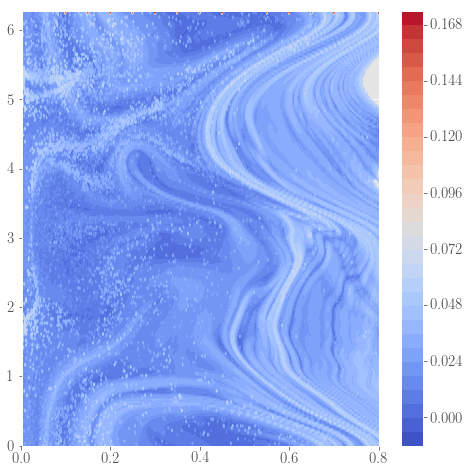

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


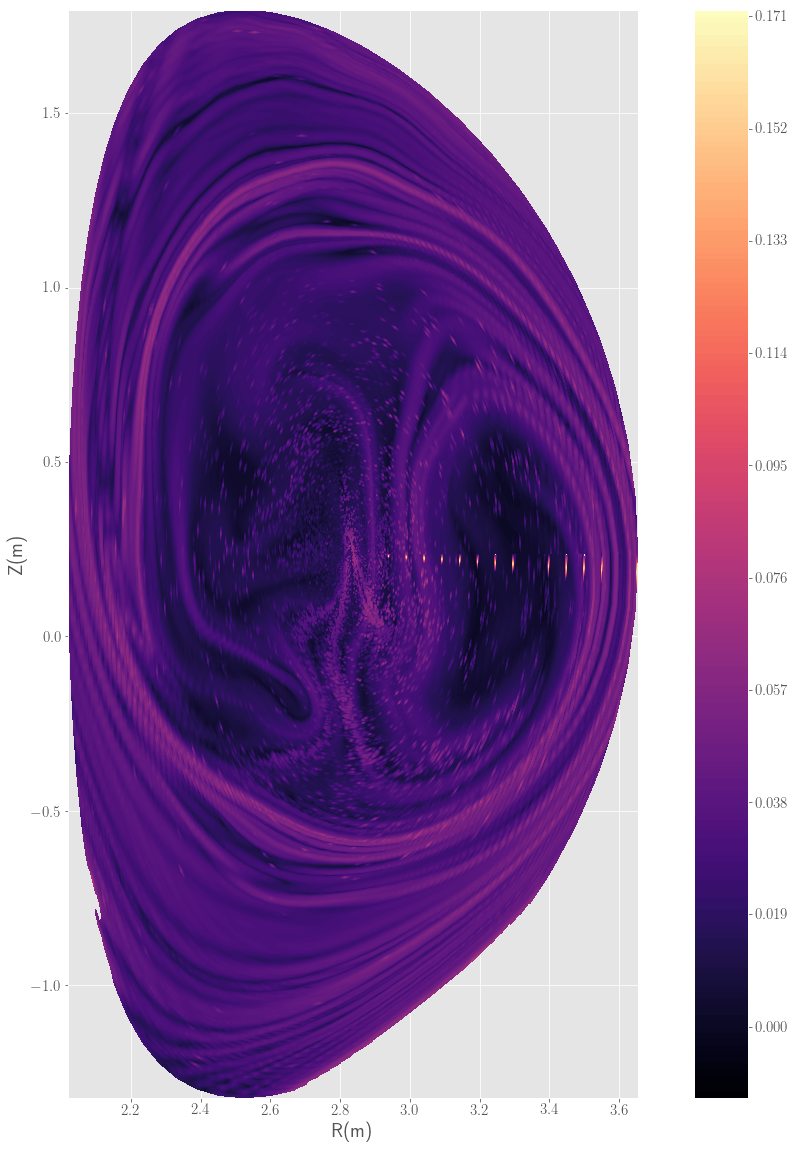

In [410]:
le500_path = "/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/int_kink/11/11_visc_old_nodiff/ftle/t-500/"

A500 = np.load(le500_path+"raw_t-500.sav.npz_giri_4.py.npz")

rs500 = A500['rr']
us500 = A500['th']
LE500 = A500['Lyap_exp']

plt.figure(figsize=(8,8))
plt.contourf(rs500,us500,LE500,30,cmap="coolwarm")
plt.colorbar()
plt.show()

x500 = pxr.x_array(rs500,us500)
z500 = pxr.z_array(rs500,us500)

plt.figure(figsize=(20,20))
plt.contourf(x500,z500,np.swapaxes(LE500,0,1),200, cmap="magma")
#plt.plot([x/ap for x in m.DS.rbbbs],[y/ap for y in m.DS.zbbbs],"k--")
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.axes().set_aspect("equal")
plt.colorbar()
plt.show()

## Initial condition placement

In [407]:
r_mg = np.linspace(0.15,0.8,20)
u_mg = np.linspace(0.001,2*np.pi,20)

In [167]:
ro = pxr.CnvNumber2LogicalR(77)
Uo = pxr.CnvNumber2LogicalU(16)

In [168]:
blob_radius = 0.2
n_rsteps = 2
n_usteps = 40
dr = blob_radius/n_rsteps
du = np.arctan(dr/ro)/n_usteps

In [169]:
r_blob = []
u_blob = []

In [170]:
i=0
for j in range(-n_usteps,n_usteps):
    r_blob.append(ro+i*dr)
    u_blob.append(Uo+j*du)

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


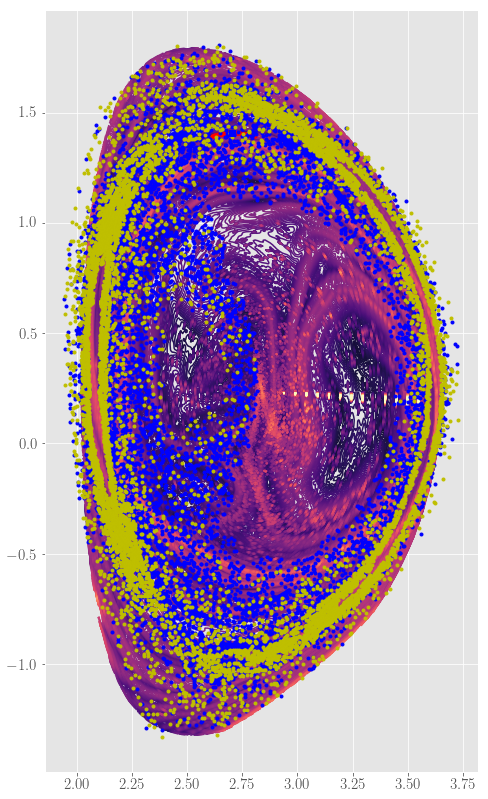

In [171]:
plt.figure(figsize=(14,14))
plt.contour(x500,z500,np.swapaxes(LE500,0,1),200,vmax = 0.2, cmap="magma")
plt.plot(pxr.X_int((r_blob,u_blob,0)),pxr.Z_int((r_blob,u_blob,0)),"r.")
plt.plot(R_behind[:],Z_behind[:],"b.")
plt.plot(R_front[:],Z_front[:],"y.")
#plt.plot(R_on[:],Z_on[:],"g.")
plt.plot(pxr.X[77,16,0],pxr.Z[77,16,0],"bs")
plt.axes().set_aspect("equal")
plt.show()

In [93]:
ic_filename = "/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/int_kink/11/11_visc_old_nodiff/ftle/t-500/blob/"

In [94]:
from scipy.io import FortranFile

In [95]:
icf = FortranFile(ic_filename+"front.bin","w")
for i in range(len(r_blob)):
    icf.write_record(np.array([r_blob[i], u_blob[i], 0]))
icf.close()

In [96]:
len(r_blob)

80

Reading Results

In [100]:
from typing import Iterable 
#from collections import Iterable                            


def flatten(items):
    """Yield items from any nested iterable; see Reference."""
    for x in items:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            for sub_x in flatten(x):
                yield sub_x
        else:
            yield x

In [389]:
R_blob_behind = np.load(ic_filename+"blob_behind/R.npy")
Z_blob_behind = np.load(ic_filename+"blob_behind/Z.npy")

In [390]:
R_blob_behind = list(flatten(R_blob_behind))
Z_blob_behind = list(flatten(Z_blob_behind))

In [391]:
R_blob_front = np.load(ic_filename+"blob_front/R.npy")
Z_blob_front = np.load(ic_filename+"blob_front/Z.npy")

In [392]:
R_blob_front = list(flatten(R_blob_front))
Z_blob_front= list(flatten(Z_blob_front))

In [98]:
R_behind = np.load(ic_filename+"behind/R.npy")
Z_behind = np.load(ic_filename+"behind/Z.npy")

In [108]:
R_behind = list(flatten(R_behind))
Z_behind = list(flatten(Z_behind))

In [113]:
R_front = np.load(ic_filename+"front/R.npy")
Z_front = np.load(ic_filename+"front/Z.npy")

In [114]:
R_front = list(flatten(R_front))
Z_front = list(flatten(Z_front))

In [116]:
R_on = np.load(ic_filename+"on/R.npy")
Z_on = np.load(ic_filename+"on/Z.npy")

In [117]:
R_on = list(flatten(R_on))
Z_on = list(flatten(Z_on))

In [129]:
len(R_behind)/80

116.625

## Blob creation

In [288]:
ro = pxr.CnvNumber2LogicalR(77)
rb2 = pxr.CnvNumber2LogicalR(67)
Uo = pxr.CnvNumber2LogicalU(16)

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


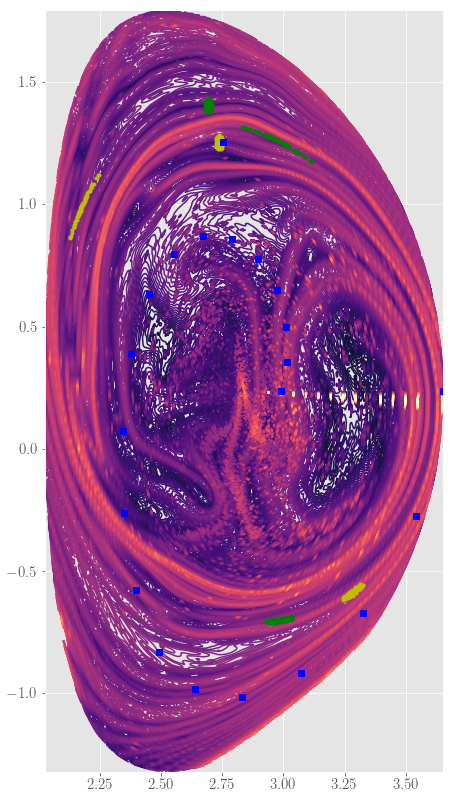

In [408]:
plt.figure(figsize=(14,14))
plt.contour(x500,z500,np.swapaxes(LE500,0,1),200,vmax = 0.2, cmap="magma")
#plt.plot(pxr.X_int((r_sblob,u_sblob,0)),pxr.Z_int((r_sblob,u_sblob,0)),"r.")
#plt.plot(pxr.X_int((r_transblob,u_transblob,0)),pxr.Z_int((r_transblob,u_transblob,0)),"y.")
plt.plot(pxr.X_int((r1,u1,0)),pxr.Z_int((r1,u1,0)),"g.")
plt.plot(pxr.X_int((r3,u3,0)),pxr.Z_int((r3,u3,0)),"y.")
plt.plot(R_blob_behind[:],Z_blob_behind[:],"g.")
plt.plot(R_blob_front[:],Z_blob_front[:],"y.")
plt.plot(pxr.X_int((r_mg,u_mg,0)),pxr.Z_int((r_mg,u_mg,0)),"bs")
#plt.plot(pxr.X_int((ro,Uo,0)),pxr.Z_int((ro,Uo,0)),"k*")
#plt.plot(X_sblob,Z_sblob,".y")
#plt.plot(Ro,Zo,"bs")
#plt.plot(R_behind[:],Z_behind[:],"b.")
#plt.plot(R_front[:],Z_front[:],"y.")
#plt.plot(R_on[:],Z_on[:],"g.")
plt.plot(pxr.X[67,16,0],pxr.Z[67,16,0],"bs")
plt.axes().set_aspect("equal")
plt.show()

In [235]:
r_sblob = []
u_sblob = []

In [236]:
rlens = np.arange(0,0.02,0.002)

In [237]:
ulens = np.arange(0,2*np.pi,2*np.pi/5)

In [238]:
for r in rlens:
    for u in ulens:
        r_sblob.append(r)
        u_sblob.append(u)

In [255]:
ru_sblob = zip(r_sblob,u_sblob)

In [254]:
for it in ru_sblob:
    print(it)

In [256]:
X_sblob = []
Z_sblob = []
for coor in ru_sblob:
    X_sblob.append(Ro+pxr.X_int((coor[0],coor[1],0))-pxr.X[0,0,0])
    Z_sblob.append(Zo+pxr.Z_int((coor[0],coor[1],0))-pxr.Z[0,0,0])

In [253]:
for coor in ru_sblob:
    print(coor)
    #print(Ro+pxr.X_int((coor[0],coor[1],0))-pxr.X[0,0,0])
    #print(Zo+pxr.Z_int((coor[0],coor[1],0))-pxr.Z[0,0,0])

In [225]:
Ro = pxr.X_int((ro,Uo,0))
Zo = pxr.Z_int((ro,Uo,0))

In [257]:
XZ_sblob = zip(X_sblob,Z_sblob)

In [258]:
r_transblob = []
u_transblob = []

In [259]:
for coor in XZ_sblob:
    r_tr, u_tr = pxr.pntCnvInGrid_shaped(coor[0],coor[1],ro,Uo)
    r_transblob.append(r_tr)
    u_transblob.append(u_tr)

In [260]:
print(X_sblob[2])

2.70484137527


In [336]:
from scipy.interpolate import interp1d

In [381]:
def blob_coordinates(ro,uo,radius,N_radial,N_poloidal):
    """Function that creates logical coordinates of blob of initial conditions.
    ro,uo: center of blob coordinates in logical grid. Found by visual inspection based on where we want to
    place the blob.
    radius: radial extent of the blob in real space.
    N_radial: number of radial steps to go from center to edge of blob.
    N_poloidal: number of poloidal steps in each radial section.
    Return the radial and poloidal coordinate lists of each blob point."""
    
    little_r = np.linspace(0,1,pxr.X.shape[0]) # logical r values
    big_R = pxr.X[:,0,0] # major radius values
    
    r_of_R = interp1d(big_R,little_r,kind='quadratic') # interpolating functions
    R_of_r = interp1d(little_r,big_R,kind='quadratic')
    
    r = r_of_R(R_of_r(0)+radius) # radius of blob in logical coordinate units
    
    Ro = pxr.X_int((ro,uo,0)) # Blob's center in real space
    Zo = pxr.Z_int((ro,uo,0))
    r_sblob = [] # Initialize blob points in logical space
    u_sblob = []
    rlens = np.arange(0,r,r/N_radial) # grid of blob points in logical space, centered at (0,0)
    ulens = np.arange(0,2*np.pi,2*np.pi/N_poloidal)
    for r in rlens: # lists of blob coordinates centered at (0,0)
        for u in ulens:
            r_sblob.append(r)
            u_sblob.append(u)
    ru_sblob = zip(r_sblob,u_sblob) # iterator (only evaluated once!)
    
    X_sblob = [] # Initialize blob points in real space
    Z_sblob = []
    for coor in ru_sblob: # Transport blob points to center them at (Ro,Zo)
        X_sblob.append(Ro+pxr.X_int((coor[0],coor[1],0))-pxr.X[0,0,0])
        Z_sblob.append(Zo+pxr.Z_int((coor[0],coor[1],0))-pxr.Z[0,0,0])
    XZ_sblob = zip(X_sblob,Z_sblob) # iterator
    
    true_diameter = max(X_sblob) - min(X_sblob)
    
    r_transblob = [] # Initialize transported blob points in logical space
    u_transblob = []
    for coor in XZ_sblob: # transform real space points back to logical space
        r_tr, u_tr = pxr.pntCnvInGrid_shaped(coor[0],coor[1],ro,uo)
        r_transblob.append(r_tr)
        u_transblob.append(u_tr)
        
    return r_transblob, u_transblob, true_diameter

In [382]:
r1,u1, d1 = blob_coordinates(ro,Uo,0.02,4,20)

In [388]:
icf = FortranFile(ic_filename+"back_blob_d=3cm.bin","w")
for i in range(len(r3)):
    icf.write_record(np.array([r3[i], u3[i], 0]))
icf.close()

In [277]:
reload(pxr)

<module 'pixie_read_st' from '/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [383]:
r3,u3,d3 = blob_coordinates(rb2,Uo,0.02,4,20)

In [337]:
little_r = np.linspace(0,1,pxr.X.shape[0])

In [339]:
big_R = pxr.X[:,0,0]

In [342]:
r_of_R = interp1d(big_R,little_r,kind='quadratic')
R_of_r = interp1d(little_r,big_R,kind='quadratic')

In [343]:
R_of_r(0)

array(2.8380424036005145)

In [346]:
r_of_R(R_of_r(0)+0.03)

array(0.029385917585531274)

In [384]:
d3

0.03000001862829027

### Verify blob radius is correct

In [376]:
X_coordinates = []
for i in range(len(r1)):
    X_coordinates.append(pxr.X_int((r1[i],u1[i],0)))

In [379]:
(max(X_coordinates) - min(X_coordinates))

0.029507871754971049

In [378]:
d1

0.03000001862829027

## t=550

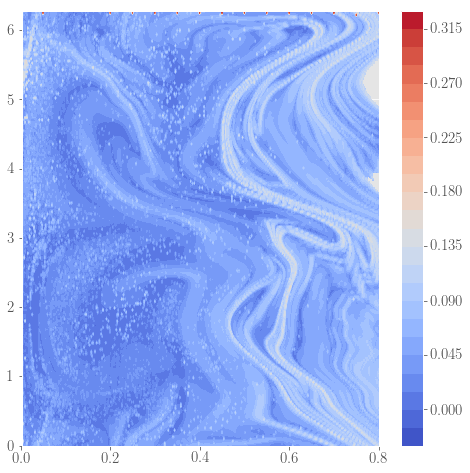

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


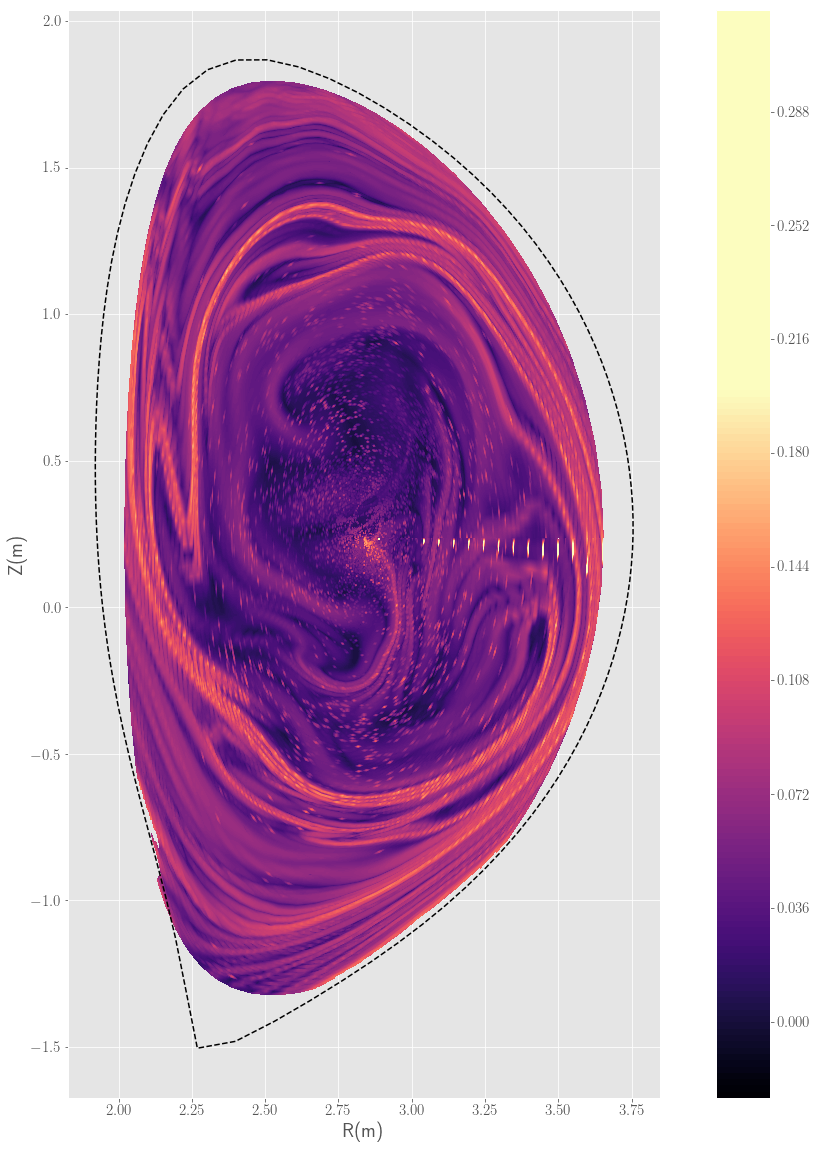

In [12]:
le550_path = "/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/int_kink/11/11_visc_old_nodiff/ftle/t-550/"

A550 = np.load(le550_path+"raw_t-550.sav.npz_giri_2.py.npz")

rs550 = A550['rr']
us550 = A550['th']
LE550 = A550['Lyap_exp']

plt.figure(figsize=(8,8))
plt.contourf(rs550,us550,LE550,30,cmap="coolwarm")
plt.colorbar()
plt.show()

x550 = pxr.x_array(rs550,us550)
z550 = pxr.z_array(rs550,us550)

plt.figure(figsize=(20,20))
plt.contourf(x550,z550,np.swapaxes(LE550,0,1),200,vmax = 0.2, cmap="magma")
plt.plot([x/ap for x in m.DS.rbbbs],[y/ap for y in m.DS.zbbbs],"k--")
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.axes().set_aspect("equal")
plt.colorbar()
plt.show()

## t=600

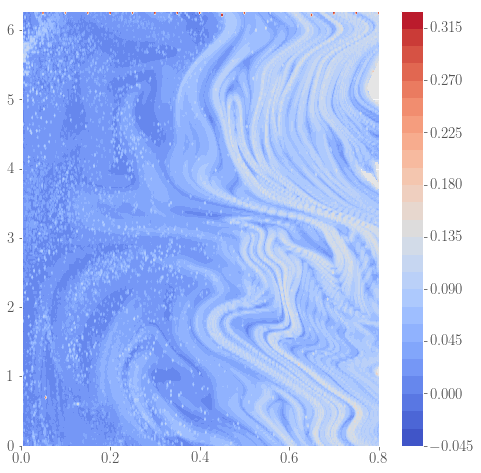

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


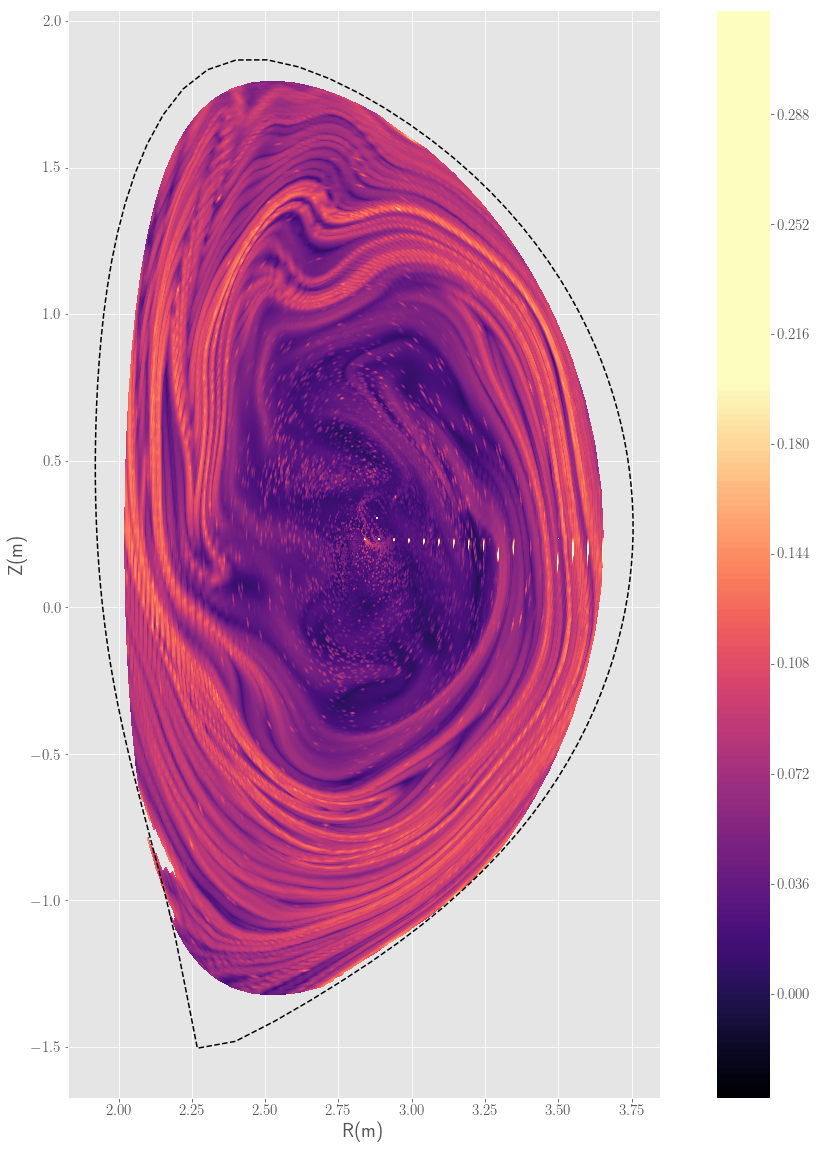

In [13]:
le600_path = "/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/int_kink/11/11_visc_old_nodiff/ftle/t-600/"

A600 = np.load(le600_path+"raw_t-600.sav.npz_giri_2.py.npz")

rs600 = A600['rr']
us600 = A600['th']
LE600 = A600['Lyap_exp']

plt.figure(figsize=(8,8))
plt.contourf(rs600,us600,LE600,30,cmap="coolwarm")
plt.colorbar()
plt.show()

x600 = pxr.x_array(rs600,us600)
z600 = pxr.z_array(rs600,us600)

plt.figure(figsize=(20,20))
plt.contourf(x600,z600,np.swapaxes(LE600,0,1),200,vmax = 0.2, cmap="magma")
plt.plot([x/ap for x in m.DS.rbbbs],[y/ap for y in m.DS.zbbbs],"k--")
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.axes().set_aspect("equal")
plt.colorbar()
plt.show()

## t=620

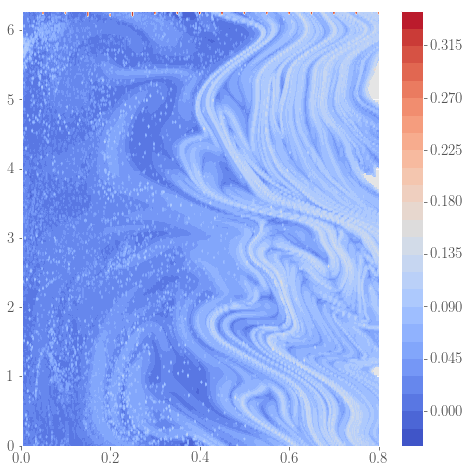

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


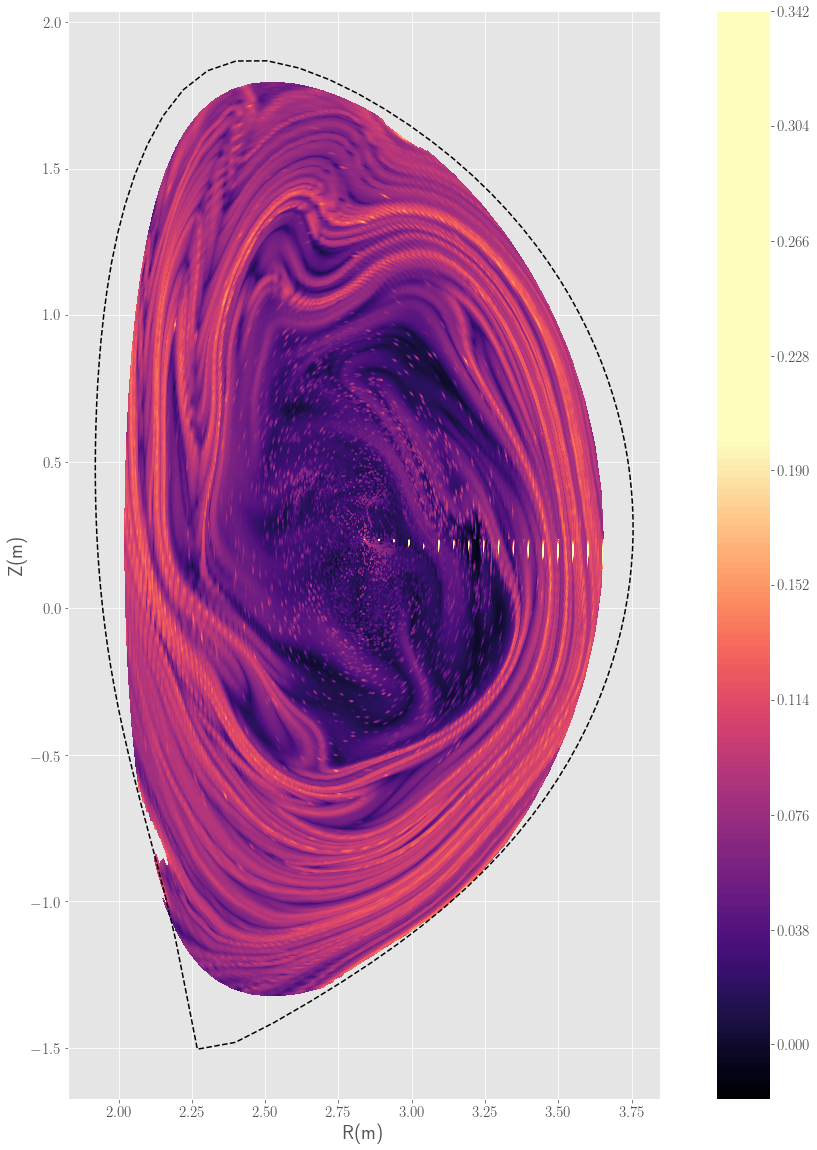

In [15]:
le620_path = "/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/int_kink/11/11_visc_old_nodiff/ftle/t-620/"

A620 = np.load(le620_path+"raw_t-620.sav.npz_giri_2.py.npz")

rs620 = A620['rr']
us620 = A620['th']
LE620 = A620['Lyap_exp']

plt.figure(figsize=(8,8))
plt.contourf(rs620,us620,LE620,30,cmap="coolwarm")
plt.colorbar()
plt.show()

x620 = pxr.x_array(rs620,us620)
z620 = pxr.z_array(rs620,us620)

plt.figure(figsize=(20,20))
plt.contourf(x620,z620,np.swapaxes(LE620,0,1),200,vmax = 0.2, cmap="magma")
plt.plot([x/ap for x in m.DS.rbbbs],[y/ap for y in m.DS.zbbbs],"k--")
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.axes().set_aspect("equal")
plt.colorbar()
plt.show()

## t=640

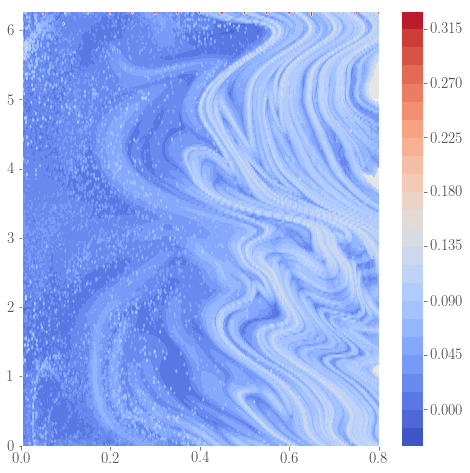

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


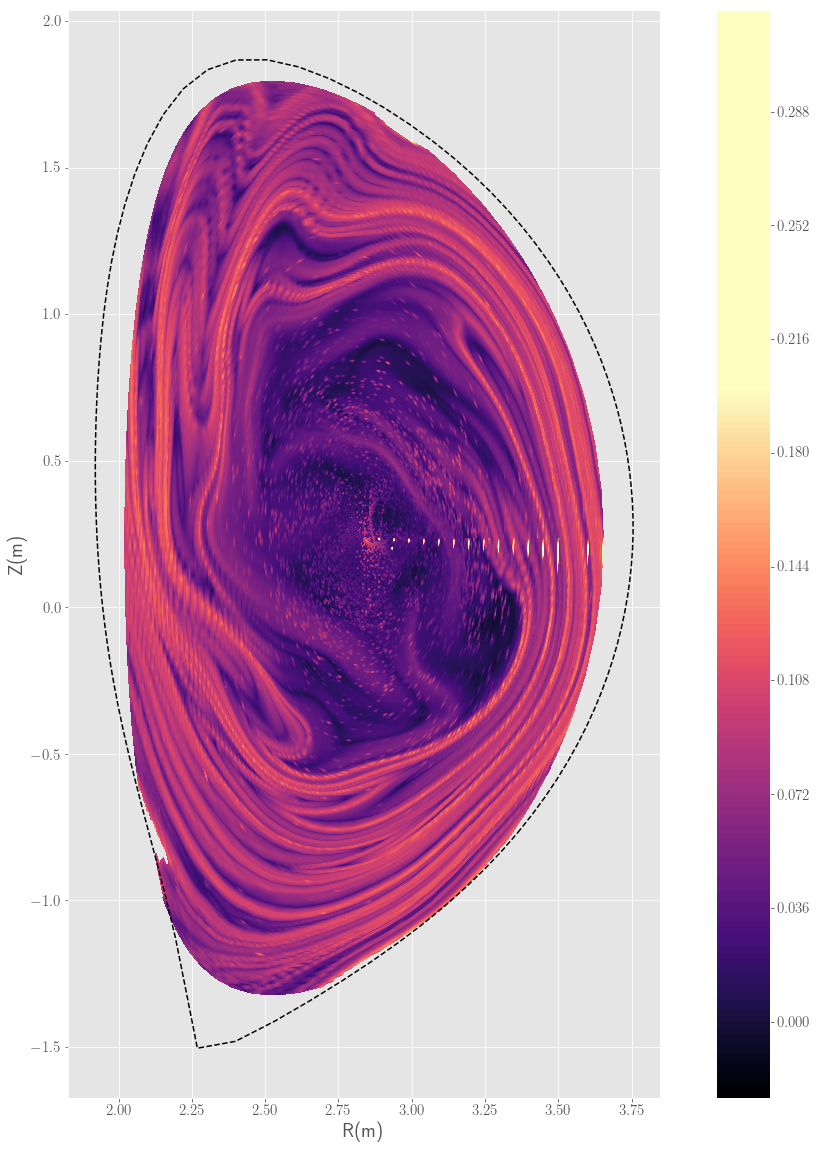

In [16]:
le640_path = "/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/int_kink/11/11_visc_old_nodiff/ftle/t-640/"

A640 = np.load(le640_path+"raw_t-640.sav.npz_giri_2.py.npz")

rs640 = A640['rr']
us640 = A640['th']
LE640 = A640['Lyap_exp']

plt.figure(figsize=(8,8))
plt.contourf(rs640,us640,LE640,30,cmap="coolwarm")
plt.colorbar()
plt.show()

x640 = pxr.x_array(rs640,us640)
z640 = pxr.z_array(rs640,us640)

plt.figure(figsize=(20,20))
plt.contourf(x640,z640,np.swapaxes(LE640,0,1),200,vmax = 0.2, cmap="magma")
plt.plot([x/ap for x in m.DS.rbbbs],[y/ap for y in m.DS.zbbbs],"k--")
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.axes().set_aspect("equal")
plt.colorbar()
plt.show()

## t=654

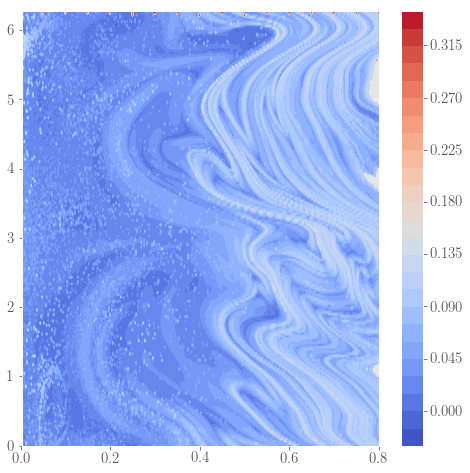

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


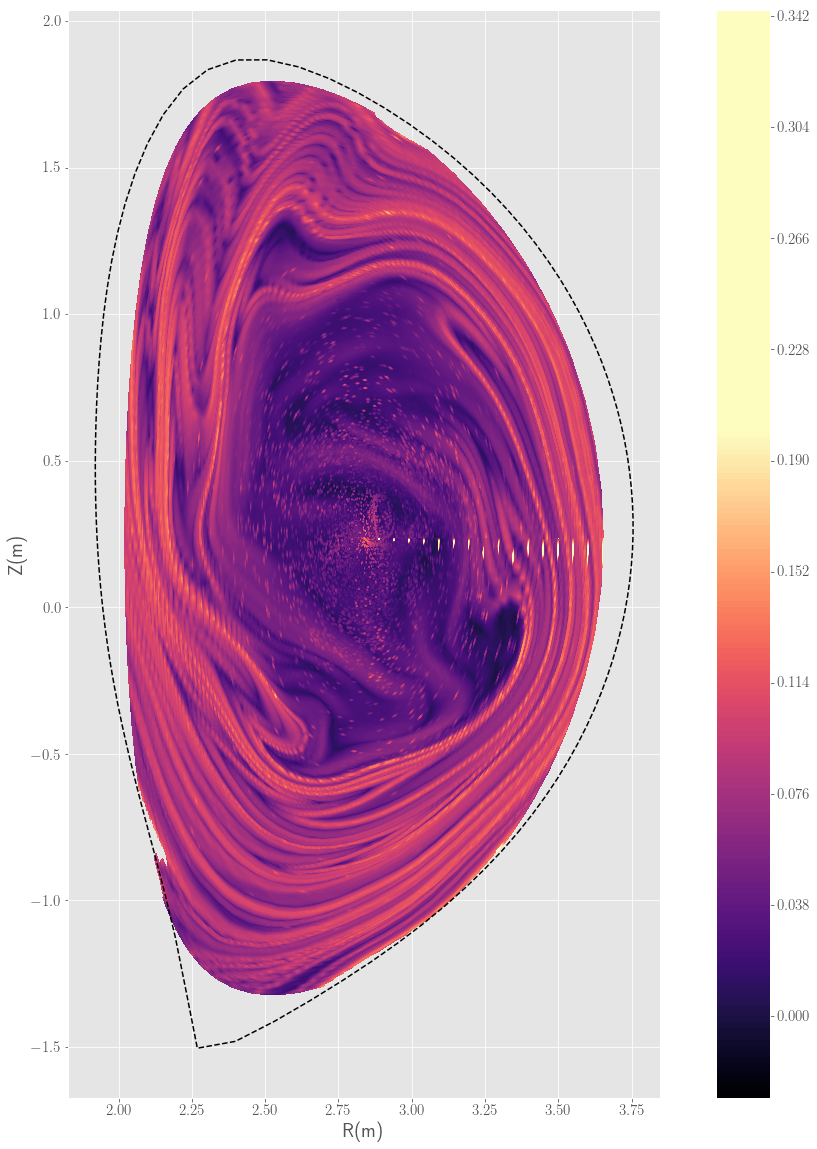

In [18]:
le654_path = "/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/int_kink/11/11_visc_old_nodiff/ftle/t-654/"

A654 = np.load(le654_path+"raw_t-654.sav.npz_giri_2.py.npz")

rs654 = A654['rr']
us654 = A654['th']
LE654 = A654['Lyap_exp']

plt.figure(figsize=(8,8))
plt.contourf(rs654,us654,LE654,30,cmap="coolwarm")
plt.colorbar()
plt.show()

x654 = pxr.x_array(rs654,us654)
z654 = pxr.z_array(rs654,us654)

plt.figure(figsize=(20,20))
plt.contourf(x654,z654,np.swapaxes(LE654,0,1),200,vmax = 0.2, cmap="magma")
plt.plot([x/ap for x in m.DS.rbbbs],[y/ap for y in m.DS.zbbbs],"k--")
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.axes().set_aspect("equal")
plt.colorbar()
plt.show()